In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import yaml
from yaml.loader import SafeLoader
from urllib.request import urlretrieve

Die 5 Insel sind folgendes
- Batanes
- Bohol
- Catanduanes
- Marinduque
- Tawi-Tawi

In [127]:
turbine_df = pd.read_csv('turbine.csv').rename(columns={'Unnamed: 0':'turbine'}).set_index('turbine')
turbine_typ = ['WES250','Vestas_V25_200kW','VesV20','En18','JI20kW']
island = ["Batanes","Bohol","Catanduanes","Marinduque","Tawi-Tawi"]
years = ["1980","1990","2000","2010","2020"]

power_df = pd.DataFrame(columns=island,index=pd.MultiIndex.from_product([years, turbine_typ]))

for (y,t) in power_df.index:
    turbine = turbine_df.loc[t]
    for r in power_df.columns:
        hub_height = round(float(turbine['HUB_HEIGHT']))
        while True:
            try:
                wind_df = pd.read_csv(f"wind_histogram/wind_hist_{hub_height}_n.csv").rename(columns={'Unnamed: 0':'region'}).set_index(['region','year'])
            except FileNotFoundError:
                hub_height = turbine['HUB_HEIGHT']
                continue
            break
        wind = wind_df.loc[r,int(y)]
        power_df.loc[(y,t),r] = sum(turbine.loc[str(n)]*wind.loc[str(n)] for n in range(len(wind)-1))

In [128]:
#power_df.to_csv('results/energieertrag_MWh_a_all_year.csv')
power_df

Batanes     Bohol Catanduanes Marinduque Tawi-Tawi
1980 WES250             747.7724   59.8227    207.1001   108.3761   36.9759
     Vestas_V25_200kW   588.7119   45.8591    161.0502    83.2371   27.5839
     VesV20                304.6    17.811      80.902     39.536    10.214
     En18              281.59341  29.73991    87.68969   49.05332  18.90476
     JI20kW              35.1355      0.76      5.9295     2.2255     0.581
1990 WES250             742.5885   73.6565    197.3535   100.3089   54.1442
     Vestas_V25_200kW   585.0483   56.7446    152.8766    77.2994   40.8358
     VesV20               303.62     22.04      75.203     35.074    16.196
     En18              277.53715  36.05762    83.82789   44.85693  27.28937
     JI20kW              35.0615     1.214      5.8305     2.2575    0.9265
2000 WES250             748.3731   51.2078    205.4023   129.6568   42.8899
     Vestas_V25_200kW   588.9248   38.7176    159.3941    99.9715   31.7847
     VesV20               302.81     15.28      79.382     48.682     13.19
     En18              280.33491   24.5768    85.89398   56.04645   20.7348
     JI20kW              35.0915    0.7635       6.194      3.194    0.8295
2010 WES250             670.1601   37.2752      127.38    81.3699   28.6337
     Vestas_V25_200kW   527.3856   28.0587     97.9068    62.3352   20.8472
     VesV20              271.686     8.784      46.688      29.37     7.415
     En18              253.72972  19.52482    57.05883   36.82748  14.60094
     JI20kW               30.606    0.3295      3.0985      1.623    0.4175
2020 WES250             776.3222   44.3448    184.1952   125.8933   45.5401
     Vestas_V25_200kW   612.5076   33.5536    143.1263    96.8204   34.1574
     VesV20              315.604    11.667      70.776     47.307    13.572
     En18              287.99408  22.59203    77.63655   53.58156  22.83324
     JI20kW               36.746    0.4795      5.6175     3.2685     0.804

In [7]:
power_df = pd.read_csv("results/energieertrag_MWh_a_all_year.csv").rename(columns={'Unnamed: 0':'year','Unnamed: 1':'turbine'})
power_df

,year,turbine,Batanes,Bohol,Catanduanes,Marinduque,Tawi-Tawi
0,1980,WES250,747.77240,59.82270,207.10010,108.37610,36.97590
1,1980,Vestas_V25_200kW,588.71190,45.85910,161.05020,83.23710,27.58390
2,1980,VesV20,304.60000,17.81100,80.90200,39.53600,10.21400
3,1980,En18,281.59341,29.73991,87.68969,49.05332,18.90476
4,1980,JI20kW,35.13550,0.76000,5.92950,2.22550,0.58100
5,1990,WES250,742.58850,73.65650,197.35350,100.30890,54.14420
6,1990,Vestas_V25_200kW,585.04830,56.74460,152.87660,77.29940,40.83580
7,1990,VesV20,303.62000,22.04000,75.20300,35.07400,16.19600
8,1990,En18,277.53715,36.05762,83.82789,44.85693,27.28937
9,1990,JI20kW,35.06150,1.21400,5.83050,2.25750,0.92650


In [19]:
power_df["plot"] = 0
for i in power_df.index:
    if power_df.loc[i,"turbine"] == "WES250":
        power_df.loc[i,"plot"] = 1
    if power_df.loc[i,"turbine"] == "Vestas_V25_200kW":
        power_df.loc[i,"plot"] = 2
    if power_df.loc[i,"turbine"] == "VesV20":
        power_df.loc[i,"plot"] = 3
    if power_df.loc[i,"turbine"] == "En18":
        power_df.loc[i,"plot"] = 4
    if power_df.loc[i,"turbine"] == "JI20kW":
        power_df.loc[i,"plot"] = 5

C:\Users\kunde\AppData\Local\Temp\ipykernel_22184\904262922.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(xticklabels=['','WES250','Vestas_V25_200kW','VesV20','En18','JI20kW',''])
C:\Users\kunde\AppData\Local\Temp\ipykernel_22184\904262922.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(yticklabels=['','0 MWh','10 MWh','100 MWh','1000 MWh'])


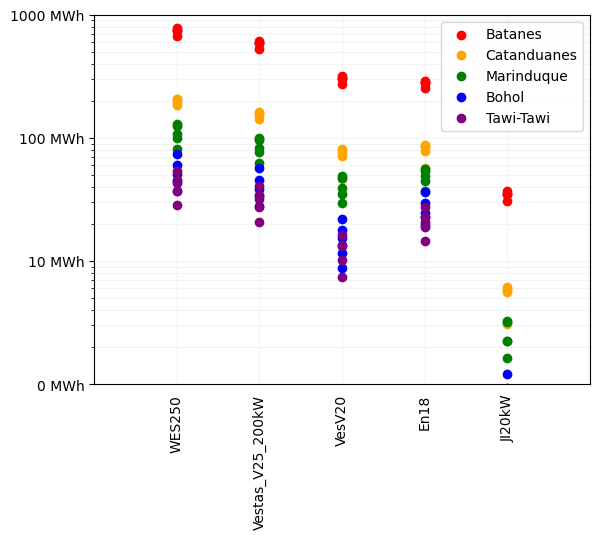

In [58]:
# The target ist to create an array where the color is based on the region while the axis is based on
fig, ax = plt.subplots()

plt.scatter(power_df["plot"], power_df['Batanes'], c='red', label='Batanes')
plt.scatter(power_df["plot"], power_df['Catanduanes'], c='orange', label='Catanduanes')
plt.scatter(power_df["plot"], power_df['Marinduque'], c='green', label='Marinduque')
plt.scatter(power_df["plot"], power_df['Bohol'], c='blue', label='Bohol')
plt.scatter(power_df["plot"], power_df['Tawi-Tawi'], c='purple', label='Tawi-Tawi')

plt.yscale('log')
ax.set(xticklabels=['','WES250','Vestas_V25_200kW','VesV20','En18','JI20kW',''])
ax.set(yticklabels=['','0 MWh','10 MWh','100 MWh','1000 MWh'])

plt.xticks(rotation=90)
ax.tick_params(bottom=False)
plt.ylim([1, 1000])
plt.xlim([0, 6])

plt.grid(axis='x',color='0.95', which='major')
plt.grid(axis='y',color='0.95', which='both')
ax.set_axisbelow(True)

plt.legend()